### Homework 3
### G Varchaleswari
### vganugapati1@student.gsu.edu

In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv("hmw3.csv")
# data = pd.DataFrame(columns= ['X','Y'],index = [6,256])
# data.loc = [6,256]
data

,X,Y
0,6,526
1,3,421
2,6,581
3,9,630
4,3,412
5,9,560
6,6,434
7,3,443
8,9,590
9,6,570


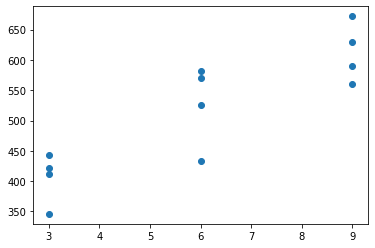

In [45]:
plt.scatter(data['X'],data['Y'])

In [46]:
data.cov()

,X,Y
X,6.545455,226.363636
Y,226.363636,10252.265152


In [47]:
data.corr()

,X,Y
X,1.00000,0.87383
Y,0.87383,1.00000


In [48]:
data.describe()

,X,Y
count,12.000000,12.000000
mean,6.000000,515.416667
std,2.558409,101.253470
min,3.000000,346.000000
25%,3.000000,430.750000
50%,6.000000,543.000000
75%,9.000000,583.250000
max,9.000000,672.000000


In [49]:
X = data.iloc[:,0]
Y = data.iloc[:,1]
X

0     6
1     3
2     6
3     9
4     3
5     9
6     6
7     3
8     9
9     6
10    3
11    9
Name: X, dtype: int64

In [50]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(data[['X']], data[['Y']], test_size = 1/3, random_state = 0)

In [51]:
X_Test

,X
6,6
11,9
4,3
10,3


In [52]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

model = regressor.fit(X_Train, Y_Train)


Y_Pred = model.predict(X_Test)
Y_Pred

array([[530.48717949],
       [607.58974359],
       [453.38461538],
       [453.38461538]])

In [53]:
model.intercept_[0]

376.28205128205127

In [54]:
print("Linear regression equation : Y = {0} + {1} X ".format(str(model.intercept_[0]),str(model.coef_[0][0])))

Linear regression equation : Y = 376.28205128205127 + 25.70085470085471 X 


### Evaluation metrics using RSE and R^2 statistic

In [55]:
#RSE
from sklearn.metrics import mean_squared_error
import math
RSS = mean_squared_error(Y_Test,Y_Pred)
RSE = math.sqrt(RSS/(data.shape[0]-2))
RSE

25.837278759604555

In [56]:
#R2
from sklearn.metrics import r2_score
R2 = r2_score(Y_Test, Y_Pred)
R2

0.5606390853616476

In [57]:
#Adjusted R2
ad_r2 = 1 - ((1 - R2)*(data.shape[0] - 1)/(data.shape[0] - data.shape[1] -1))
ad_r2

0.4630033265531249

In [58]:
#MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(Y_Test, Y_Pred)
MAE

77.41666666666669

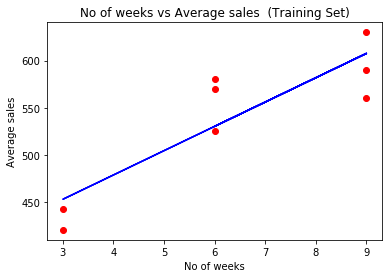

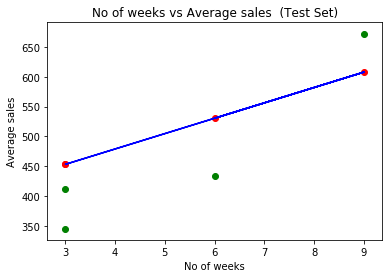

In [59]:
# Visualising the Training set results

plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('No of weeks vs Average sales  (Training Set)')
plt.xlabel('No of weeks')
plt.ylabel('Average sales')
plt.show()

# Visualising the Test set results

plt.scatter(X_Test, Y_Pred, color = 'red')
plt.scatter(X_Test, Y_Test, color = 'green')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('No of weeks vs Average sales  (Test Set)')
plt.xlabel('No of weeks')
plt.ylabel('Average sales')
plt.show()


In [61]:
from statsmodels.formula.api import ols
model_name = ols('Y ~ X', data=data).fit()
model_name.summary()

C:\Users\G.S Ramchandra\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     32.30
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           0.000203
Time:                        14:22:58   Log-Likelihood:                -63.264
No. Observations:                  12   AIC:                             130.5
Df Residuals:                      10   BIC:                             131.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    307.9167     39.437      7.808      0.000     220.045     395.789
X             34.5833      6.085      5.683      0.000      21.024      48.142
==============================================================================
Omnibus:                        1.245   Durbin-Watson:                   2.333
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                0.854
Skew:                          -0.341   Prob(JB):                        0.652
Kurtosis:                       1.885   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Naive Bayes

In [62]:
nb = pd.read_csv("NB.csv")
nb

,Example No.,Color,Type,Origin,Stolen?
0,1,Red,Sports,Domestic,Yes
1,2,Red,Sports,Domestic,No
2,3,Red,Sports,Domestic,Yes
3,4,Yellow,Sports,Domestic,No
4,5,Yellow,Sports,Imported,Yes
5,6,Yellow,SUV,Imported,No
6,7,Yellow,SUV,Imported,Yes
7,8,Yellow,SUV,Domestic,No
8,9,Red,SUV,Imported,No
9,10,Red,Sports,Imported,Yes


In [63]:
from sklearn import preprocessing as pp
le = pp.LabelEncoder()
nb['Color'] = le.fit_transform(nb['Color'])
nb['Type'] = le.fit_transform(nb['Type'])
nb['Origin'] = le.fit_transform(nb['Origin'])
nb['Stolen?'] = le.fit_transform(nb['Stolen?'])
nb

,Example No.,Color,Type,Origin,Stolen?
0,1,0,1,0,1
1,2,0,1,0,0
2,3,0,1,0,1
3,4,1,1,0,0
4,5,1,1,1,1
5,6,1,0,1,0
6,7,1,0,1,1
7,8,1,0,0,0
8,9,0,0,1,0
9,10,0,1,1,1


In [64]:
#split into features and labels for the required classification

features = nb.iloc[:,1:4]
labels = nb['Stolen?']
print(" Features: \n",features," \n Labels: \n", labels)

 Features: 
    Color  Type  Origin
0      0     1       0
1      0     1       0
2      0     1       0
3      1     1       0
4      1     1       1
5      1     0       1
6      1     0       1
7      1     0       0
8      0     0       1
9      0     1       1  
 Labels: 
 0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    0
9    1
Name: Stolen?, dtype: int32


In [65]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(features,labels)

predicted = model.predict([[0,0,0]])

predicted

array([0])

The prediction outcome for Red Domestic SUV is No. That means a Red Domestic SUV will not be stolen